### Slade Brooks
##### brooksl@mail.uc.edu
##### 02.17.2023
# AeroComputing Assignment 4

This code

# Part 1

In [58]:
# import shtuff
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd

# import custom modules
sys.path.append("..//lib//")
import pyvot

# Part 2

## Part A

In [59]:
# create datasets for problem 15
T = np.array([-250., -200., -100., 0., 100., 300.])
cp = np.array([0.0163, 0.318, 0.699, 0.87, 0.941, 1.04])

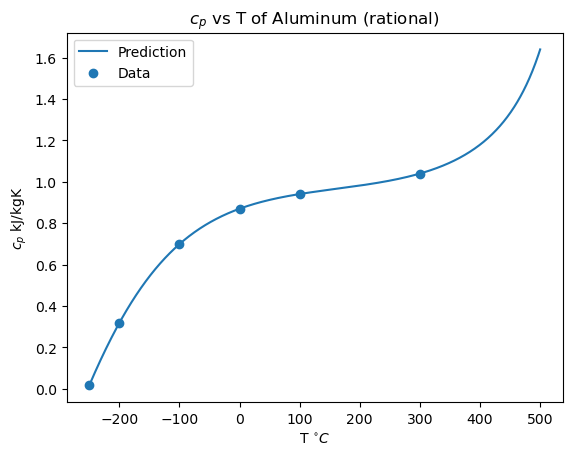

In [60]:
# solve with rational

# set up new T range
Tsr = np.arange(-250, 501, 1)

# create array for vals
cpsr = np.empty(len(Tsr), dtype="float64")

# compute val at each T
for i in range(0, len(Tsr)):
    cpsr[i] = pyvot.rational(T.copy(), cp.copy(), Tsr[i])

# plot dat shtuff
plt.plot(Tsr, cpsr, label="Prediction")
plt.scatter(T, cp, label="Data")
plt.legend()
plt.xlabel("T $^{\circ}C$")
plt.ylabel("$c_{p}$ kJ/kgK")
plt.title("$c_{p}$ vs T of Aluminum (rational)")
plt.show()

We can see that the rational prediction indicates a positive exponential growth trend after the data ends.

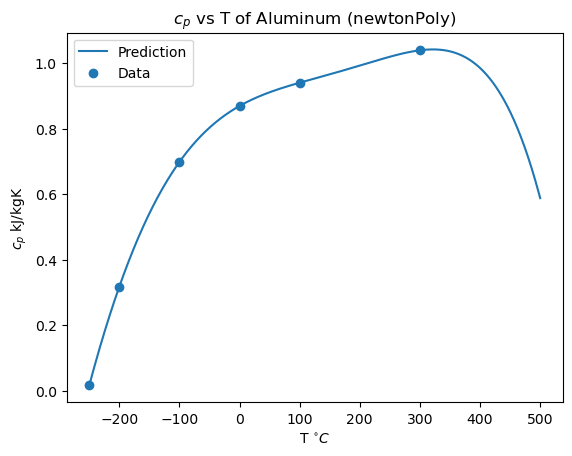

In [61]:
# solve with newtonPoly

# get coefficients of newton's poly
a = pyvot.coeffts(T.copy(), cp.copy())

# set up new T range
TsN = np.arange(-250, 501, 1)

# create array for vals
cpsN = np.empty(len(TsN), dtype="float64")

# compute val at each T
for i in range(0, len(TsN)):
    cpsN[i] = pyvot.evalPoly(a, T.copy(), TsN[i])

# plot dat shtuff
plt.plot(TsN, cpsN, label="Prediction")
plt.scatter(T, cp, label="Data")
plt.legend()
plt.xlabel("T $^{\circ}C$")
plt.ylabel("$c_{p}$ kJ/kgK")
plt.title("$c_{p}$ vs T of Aluminum (newtonPoly)")
plt.show()

We can see that the newtonPoly prediction indicates a negative exponential growth trend after the data ends.

## Part B

In [62]:
# create datasets for problem 17
Re = np.array([0.2, 2., 20., 200., 2000., 20000.])
cd = np.array([103., 13.9, 2.72, 0.8, 0.401, 0.433])

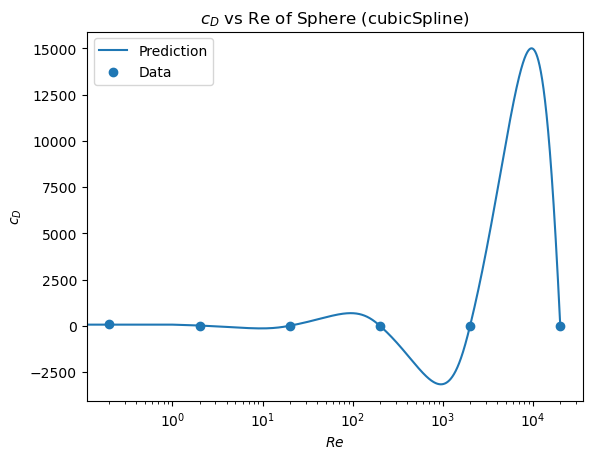

In [63]:
# solve using cubicSpline

# create array for desired study points
ResC = np.arange(0, 20001, 1)

# create array for vals
cdsC = np.empty(len(ResC), dtype="float64")

# find out about dem curves
k = pyvot.curvatures(Re.copy(), cd.copy())

# find Cd @ each Re
for i in range(0, len(ResC)):
    cdsC[i] = pyvot.evalSpline(Re.copy(), cd.copy(), k, ResC[i])

# plot dat shtuff
plt.semilogx(ResC, cdsC, label="Prediction")
plt.scatter(Re, cd, label="Data")
plt.legend()
plt.xlabel("$Re$")
plt.ylabel("$c_{D}$")
plt.title("$c_{D}$ vs Re of Sphere (cubicSpline)")
plt.show()

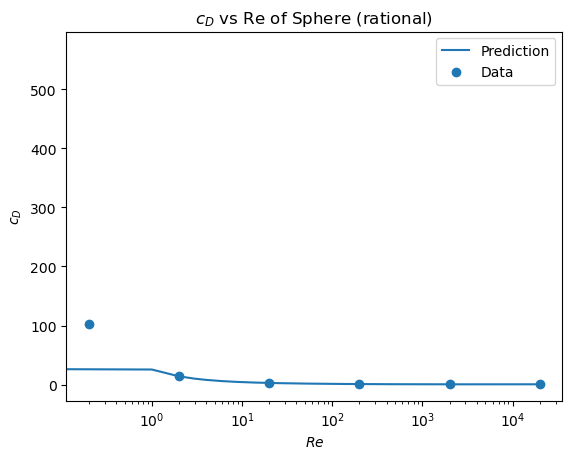

In [64]:
# solve using rational

# set up new T range
ResR = np.arange(0, 20001, 1)

# create array for vals
cdsR = np.empty(len(ResR), dtype="float64")

# compute val at each T
for i in range(0, len(ResR)):
    cdsR[i] = pyvot.rational(Re.copy(), cd.copy(), ResR[i])

# plot dat shtuff
plt.semilogx(ResR, cdsR, label="Prediction")
plt.scatter(Re, cd, label="Data")
plt.legend()
plt.xlabel("$Re$")
plt.ylabel("$c_{D}$")
plt.title("$c_{D}$ vs Re of Sphere (rational)")
plt.show()

In [65]:
# create and print a table of the results to answer problem

# make a dictionary of the values
perf = {"Reynolds #": ["5", "50", "500", "5000"],
        "cubicSpline": [cdsC[5], cdsC[50], cdsC[500], cdsC[5000]],
        "Rational": [cdsR[5], cdsR[50], cdsR[500], cdsR[5000]]}

# create a pandas dataframe
df = pd.DataFrame(perf)

# get rid of decimals
pd.options.display.float_format = '{:,.3f}'.format

# output table
print(df)

  Reynolds #  cubicSpline  Rational
0          5      -88.940     6.662
1         50      458.288     1.652
2        500   -2,118.759     0.545
3       5000    9,920.956     0.380


# Part 3

## Part A

In [66]:
# create datasets of data
year = np.arange(1994, 2010, 1)
ppm = np.array([356.8, 358.2, 360.3, 361.8, 364., 365.7, 366.7, 368.2, \
                370.5, 372.2, 374.9, 376.7, 378.7, 381., 382.9, 384.7])

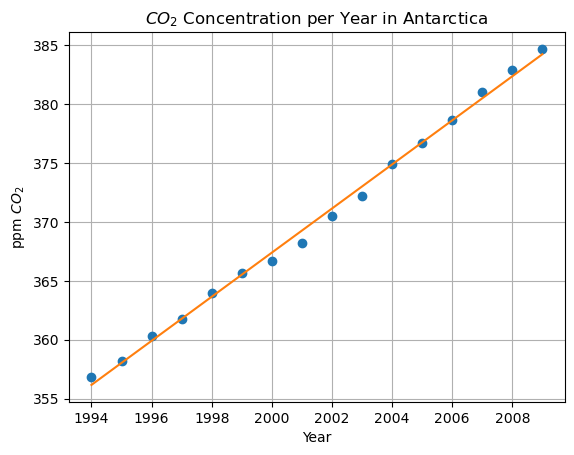

The average increase is 1.872 ppm/year.


In [67]:
# use polyFit to fit a straight line to data

# polyfit for m=1 (line)
c = pyvot.polyFit(year.copy(), ppm.copy(), 1)

# plot data
plt.title("$CO_{2}$ Concentration per Year in Antarctica")
pyvot.plotPoly(year.copy(), ppm.copy(), c, "Year", "ppm $CO_{2}$")

# slope of the line is average increase given by the c1 coefficient (y=mx+b -> y = c1x + c0)
print("The average increase is {:.3f} ppm/year.".format(c[1]))

## Part B

In [82]:
# create datasets for problem
t = np.arange(0, 6, 0.5)

# taking log to convert to linear and percentage decayed
y = -100*np.log(np.array([1., .994, .99, .985, .979, .977, .972, .969, .967, .96, .956, .952]))

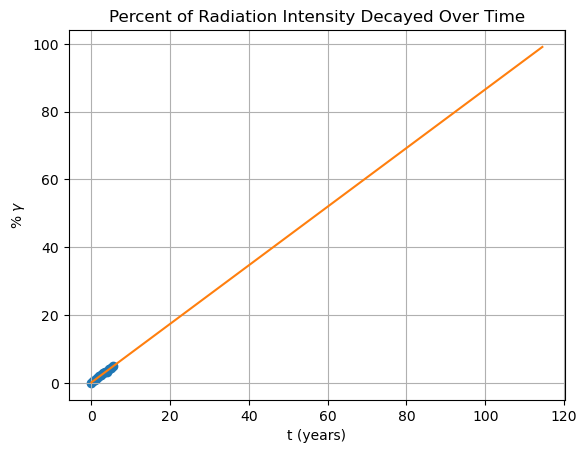

The half life is roughly 57.69 years.


In [99]:
# use polyFit to fit a straight line to data

# set time range
ts = np.arange(0, 115, 0.5)

# make long plot array
ys = np.empty(len(ts))

# polyfit for m=1 (line)
c = pyvot.polyFit(t.copy(), y.copy(), 1)

# plot for a while
for i in range(0, len(ts)):
    ys[i] = c[1]*ts[i] + c[0]

# plot data
plt.grid()
plt.plot(ts, ys, color="#ff7f0e")
plt.scatter(t, y)
plt.title("Percent of Radiation Intensity Decayed Over Time")
plt.xlabel("t (years)")
plt.ylabel("% $\gamma$")
plt.show()

# determine half life (where ys=50)
print("The half life is roughly {:.2f} years.".format((50 - c[0])/c[1]))

# Part 4

## Part A

## Part B

# Part 5

## Part A

## Part B

## Part C

## Part D

## Part E